# 1. Data Set Explanation and Preview
The following data is from a study conducted in Portugal that explores how data mining techniques can predict high school academic performance in two subjects, mathematics and the Portuguese language, which have a high failure rate. It uses real data derived from school reports and surveys. Student achievement, or performance, is measured through classification and regression tasks. Four data mining models were tested using various input scenarios; decision trees, random forests, neural networks, and support vector machine. Essentially, the study aims to identify factors that influence academic performance.

Key features from the data set:
- Demographic (Age, gender, urban/rural living)
- Social (Family size, parents' education, romantic relationships, free time, social activities)
- Behavior (Absences, study time, failures, alcohol consumption, internet access)
- School information (Name, course, travel, support services)

In [75]:
import pandas as pd

# read data
math_data = pd.read_csv('student-mat.csv', sep=';')
port_data = pd.read_csv('student-por.csv', sep=';')

# print first 10 rows
print("STUDENT MATHEMATICS DATA:")
print(math_data.head(10))

print()
print()

print("STUDENT PORTUGUESE DATA:")
print(port_data.head(10))

STUDENT MATHEMATICS DATA:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4   at_home   teacher   
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   
6     GP   M   16       U     LE3       T     2     2     other     other   
7     GP   F   17       U     GT3       A     4     4     other   teacher   
8     GP   M   15       U     LE3       A     3     2  services     other   
9     GP   M   15       U     GT3       T     3     4     other     other   

   ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0  ...      4        3      4     1     1      3      

# 2. Bar Graph

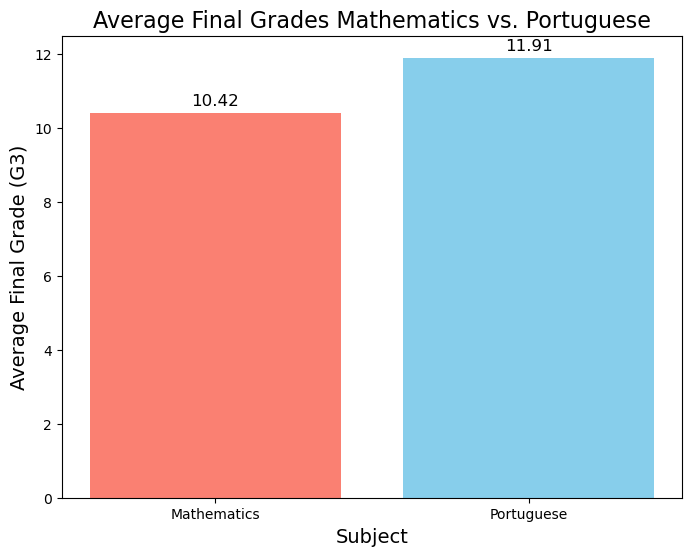

In [76]:
import matplotlib.pyplot as plt

# Load data
math_data = pd.read_csv('student-mat.csv', sep=';')
port_data = pd.read_csv('student-por.csv', sep=';')

# Calculate average for final grades (G3)
avg_grades = {
    'Mathematics': math_data['G3'].mean(),
    'Portuguese': port_data['G3'].mean()
}

# Visualize
fig1 = plt.figure(figsize=(8, 6))
bars = plt.bar(avg_grades.keys(), avg_grades.values(), color=['salmon', 'skyblue'])

# Show value of bars
for bar in bars:            # iterate through each bar
    yVal = bar.get_height() # Get height of current bar
    plt.text(bar.get_x() + bar.get_width() / 2, yVal + 0.2, f'{yVal:.2f}', # Format value of bar
            ha='center', fontsize=12) # Set alignment of value
    
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Average Final Grade (G3)', fontsize=14)
plt.title('Average Final Grades Mathematics vs. Portuguese', fontsize=16)
plt.show()

fig1.savefig("YarixaPerez_BarGraph")

This bar graph shows the average final grade (G3) of student in two subjects, mathematics and Portuguese. Each bar represents the average final score (G3 is the attribute in the dataset that represents a student's final grade), where the scores range from 0 to 20. The visualization shows that the average final grade in Portuguese is higher than in mathematics. This suggests that grading standards, curriculum difficulty, and teaching effectiveness varies between both subjects. It also suggects that Portuguese is an easier subject than mathematics.

# 3. Line Graph

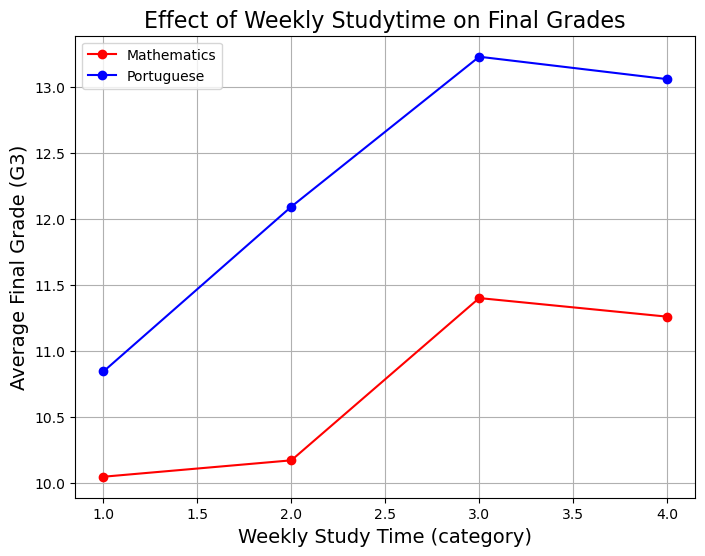

In [77]:
# Load data
math_data = pd.read_csv('student-mat.csv', sep=';')
port_data = pd.read_csv('student-por.csv', sep=';')

# Group by study time, calculate average final grade
math_avg = math_data.groupby('studytime')['G3'].mean()
port_avg = port_data.groupby('studytime')['G3'].mean()

# Visualize
fig2=plt.figure(figsize=(8, 6))
plt.plot(math_avg.index, math_avg.values, marker='o', label='Mathematics', color='red')
plt.plot(port_avg.index, port_avg.values, marker='o', label='Portuguese', color='blue')
plt.xlabel('Weekly Study Time (category)', fontsize=14)
plt.ylabel('Average Final Grade (G3)', fontsize=14)
plt.title('Effect of Weekly Studytime on Final Grades', fontsize=16)
plt.grid(True)
plt.legend()
plt.show()
fig2.savefig("YarixaPerez_LineGraph")

This line graph shows the relationship between weekly study time and average final grades (G3) for students who took the subjects mathematics and Portuguese. The visualization shows that both subjects generally have a positive correlation between study time and final grades. Also, students who study over 10 hours per week have the highest average grades. For context, study time is categorized as follows:
- Category 1: Studied less than 2 hours
- Category 2: Studied between 2 and 5 hours
- Category 3: Studied between 5 and 10 hours
- Category 4: Studied more than 10 hours

In addition, lower study time categories shows lower academic performance, a correlation that is consistent in both subjects. The trend is slightly steeper in the mathematics category. This means that more study time in this subject shows better improvement in mathematics than in Portuguese.

# 4. Pie Chart

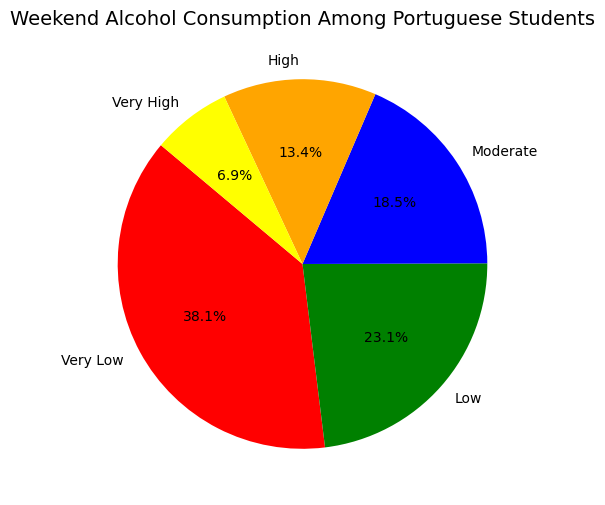

In [78]:
# Load  data
port_data = pd.read_csv('student-por.csv', sep=';')

# Count frequency of each alcohol consumption level
walc_counts = port_data['Walc'].value_counts().sort_index()

# Numeric levels
walc_labels = {
    1: 'Very Low',
    2: 'Low',
    3: 'Moderate',
    4: 'High',
    5: 'Very High'
}
labels = [walc_labels[level] for level in walc_counts.index]

# Visualization
fig3 = plt.figure(figsize=(8, 6))
plt.pie(walc_counts.values, labels=labels, autopct='%1.1f%%', startangle=140,
        colors=["red", "green", "blue", "orange", 'yellow'])
plt.title('Weekend Alcohol Consumption Among Portuguese Students', fontsize=14)
plt.show()
fig3.savefig("YarixaPerez_PieChart")

The pie chart shows the weekend alcohol comsumption among who take Portuguese. The classifications are:

- 1 Very low
- 2 Low
- 3 Moderate
- 4 High
- 5 Very high

The visualization shows that student's most common consumption levels range from moderate to very low. Fewer students report to consume alcohol in high and very high amounts. This can affect health and especially academic performance. This data can be used to observe how lifestyle behaviors influence learning outcomes and which require intervention strategies to be dealt with.

# 5. Box Chart

<Figure size 800x600 with 0 Axes>

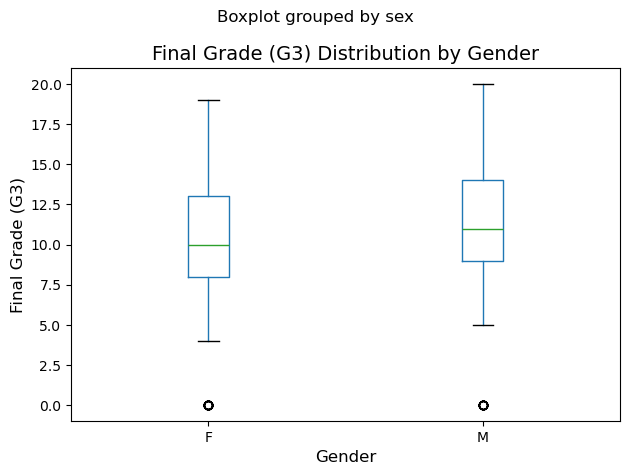

In [79]:
# Load data
math_data = pd.read_csv('student-mat.csv', sep=';')

# Create boxplot of final grade (G3) by gender
fig4=plt.figure(figsize=(8, 6))
math_data.boxplot(column='G3', by='sex', grid=False)
plt.title('Final Grade (G3) Distribution by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Final Grade (G3)', fontsize=12)
plt.tight_layout()
plt.show()
fig4.savefig("YarixaPerez_BoxChart")

The box chart represents the final grades (G3) for male and female students in the mathematics subjects. It shows that female students have higher median grades than their counterparts. The interquartiles suggests female students' final grades vary less whereas the male students show a wider spread of scores. This data can be used to further measure gender-based performance trends and allow for changes to be made in the teaching curriculum to provide more educational support across the board.